# Handwritten digits classification using neural network

# Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Load the Dataset

In [2]:
mnist = tf.keras.datasets.mnist

# Split the data into train and test split

In [4]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

# Data Visulaization

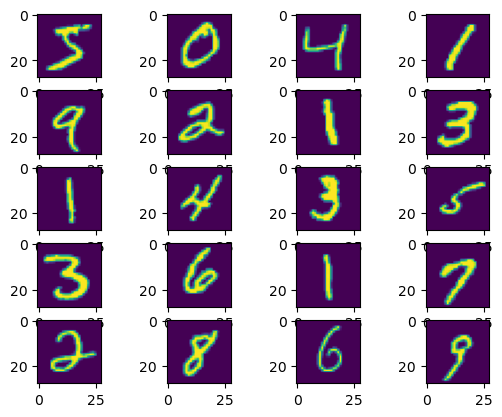

In [11]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(X_train[i])

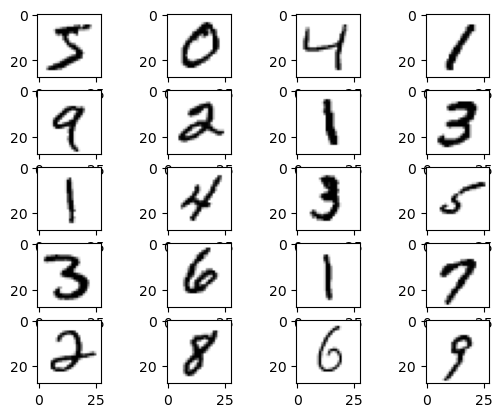

In [12]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

# Before Normalization

In [13]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalizing the Data

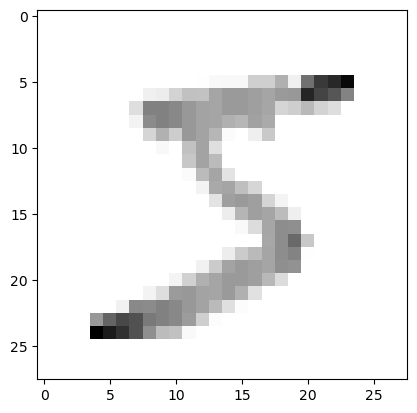

In [15]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

# After Normalization

In [16]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
print(y_train[0])

5


# Resizing the image to make it sutiable for apply Conolution operation

In [18]:
# increasing one dimension for kernel operation
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension", X_train.shape)
print("Testing samples dimension", X_test.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


# Creating Deep Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
# Creating a neural network
model = Sequential()

# Fist Convolution layer
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))  
          
# Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
          
# Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))
          
# Last Fully Connected layer 
model.add(Dense(10))
model.add(Activation("softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [24]:
print("Total Training Samples = ", len(X_train))

Total Training Samples =  60000


In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
model.fit(X_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 0.3286 - accuracy: 0.8975 - val_loss: 0.1404 - val_accuracy: 0.9559
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1054 - accuracy: 0.9675 - val_loss: 0.0883 - val_accuracy: 0.9729
Epoch 3/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0832 - val_accuracy: 0.9749
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0592 - val_accuracy: 0.9819


# Evaluation of the model on testing dataset

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0599 - accuracy: 0.9820
Test loss on 10,000 test samples 0.05989978089928627
Validation Accuracy on 10,000 test samples 0.9819999933242798


# Prediction

In [29]:
pred = model.predict([X_test])
pred

313/313 [==============================] - 3s 9ms/step


array([[1.5671327e-06, 4.4370067e-06, 1.9546007e-05, ..., 9.9997187e-01,
        7.9428602e-08, 1.0847803e-06],
       [2.0809944e-06, 1.3570267e-05, 9.9996448e-01, ..., 7.1922486e-06,
        2.0195691e-06, 2.4190533e-07],
       [1.1333225e-06, 9.9996591e-01, 1.1548061e-06, ..., 1.3311634e-05,
        9.0070370e-07, 6.1273499e-06],
       ...,
       [8.1050455e-09, 6.3075731e-08, 3.3995864e-08, ..., 3.9368742e-06,
        3.1786935e-06, 2.1470511e-04],
       [2.8720167e-06, 3.2846206e-09, 1.7890893e-10, ..., 1.5858163e-10,
        8.6469357e-05, 2.0121978e-07],
       [4.4989787e-04, 1.6949804e-06, 3.8085255e-04, ..., 7.0041381e-08,
        6.7279208e-05, 6.3500488e-06]], dtype=float32)

Taking any random image to test

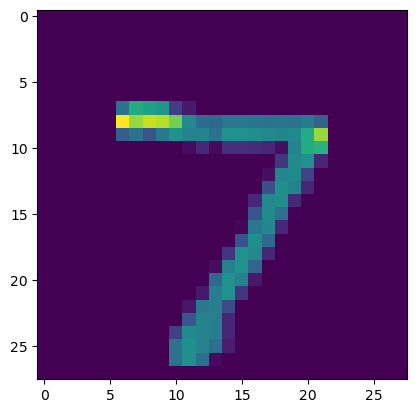

In [30]:
plt.imshow(X_test[0])

In [31]:
print(np.argmax(pred[0]))   # successfully verified

7


Lets check for one more image which is at 128 position in test dataset

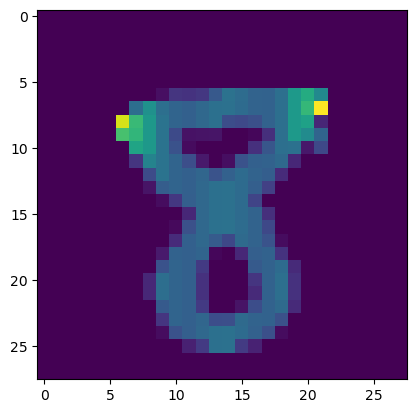

In [32]:
plt.imshow(X_test[128])

In [35]:
print(np.argmax(pred[128]))   # successfully verified

8


# Save the Model

In [36]:
import pickle

with open('MNIST_model.pkl', 'wb') as files:
    pickle.dump(model, files)